In [12]:
import tensorflow as tf

In [ ]:
!pip install matplotlib

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [1]:
pip show tensorflow


Name: tensorflow
Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\asgor\anaconda3\envs\banana\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
print('hello')

hello


In [5]:

import os
gpu_available = tf.test.is_gpu_available()

if gpu_available:
    # Get GPU details using system command
    command = "nvidia-smi --query-gpu=gpu_name --format=csv,noheader"
    gpu_model = os.popen(command).read().strip()

    if gpu_model:
        print("GPU Model:", gpu_model)
print('Okkaskgggffghgb')

GPU Model: NVIDIA GeForce RTX 3060 Ti
Okkaskgggffghgb


In [6]:
datauc = tf.keras.utils.image_dataset_from_directory('data', batch_size = 32, image_size = (299,299))

Found 16092 files belonging to 3 classes.


In [7]:
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

In [8]:
def preprocess_images(images, labels):
    images = preprocess_input(images)
    return images, labels

# Apply normalization to the dataset
datauc_normalized = datauc.map(preprocess_images)

In [9]:
train_size = int(len(datauc_normalized) * 0.7)

val_size = int(len(datauc_normalized) * 0.2)

test_size = int(len(datauc_normalized) * 0.1)

In [10]:
train = datauc_normalized.take(train_size)
val = datauc_normalized.skip(train_size).take(val_size)
test = datauc_normalized.skip(train_size + val_size).take(test_size)

In [16]:
from matplotlib import pyplot as plt

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, History
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping

In [18]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

83683744/83683744 [==============================] - 28s 0us/step


In [19]:
model = Sequential()

In [20]:
from keras.regularizers import l2

In [21]:
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0000018)))
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0018)))
model.add(Dropout(0.20))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0018)))
model.add(Dense(3, activation='softmax'))
# Freeze the layers of the Xception base
for layer in base_model.layers:
    layer.trainable = False

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = History()
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[history])

Epoch 1/50
352/352 [==============================] - 76s 193ms/step - loss: 1.0585 - accuracy: 0.8999 - val_loss: 0.4110 - val_accuracy: 0.9581
Epoch 2/50
352/352 [==============================] - 69s 197ms/step - loss: 0.4223 - accuracy: 0.9559 - val_loss: 0.3857 - val_accuracy: 0.9609
Epoch 3/50
352/352 [==============================] - 70s 198ms/step - loss: 0.3508 - accuracy: 0.9681 - val_loss: 0.3264 - val_accuracy: 0.9681
Epoch 4/50
352/352 [==============================] - 70s 197ms/step - loss: 0.2990 - accuracy: 0.9756 - val_loss: 0.3128 - val_accuracy: 0.9709
Epoch 5/50
352/352 [==============================] - 70s 197ms/step - loss: 0.2599 - accuracy: 0.9798 - val_loss: 0.3193 - val_accuracy: 0.9613
Epoch 6/50
352/352 [==============================] - 69s 197ms/step - loss: 0.2232 - accuracy: 0.9862 - val_loss: 0.2740 - val_accuracy: 0.9747
Epoch 7/50
352/352 [==============================] - 69s 197ms/step - loss: 0.1998 - accuracy: 0.9860 - val_loss: 0.2973 - val_ac

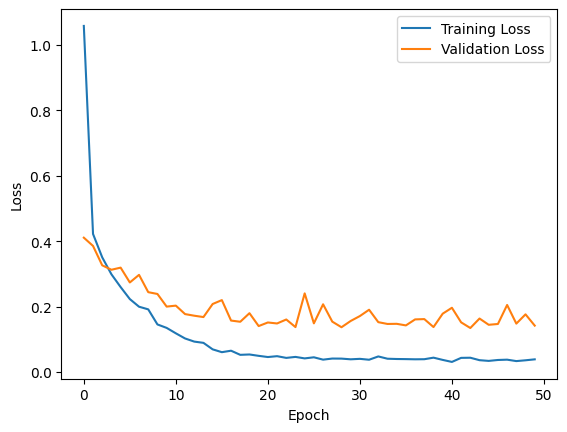

In [24]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy
sparse_accuracy = SparseCategoricalAccuracy()
for bat in test.as_numpy_iterator():
    X, y = bat
    yhat = model.predict(X)
    sparse_accuracy.update_state(y, yhat)
print("Test Accuracy: ", sparse_accuracy.result())

1/1 [==============================] - 0s 27ms/step
Test Accuracy:  tf.Tensor(0.980625, shape=(), dtype=float32)


In [26]:
print('hfghuy')

hfghuy


In [27]:
model.save(os.path.join('models','XceptionN.h5'))

In [1]:
print('jhjhgj')

jhjhgj


In [1]:
import os
from tensorflow.keras.models import load_model

In [2]:
model_path = os.path.join('models', 'XceptionN.h5')


model = load_model(model_path)

In [3]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\asgor\anaconda3\envs\banana\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'test' is a TensorFlow dataset
# Replace 'your_model' with your actual trained model


# Initialize empty arrays to store predictions and true labels
all_y_pred = np.array([], dtype=int)
all_true_labels = np.array([], dtype=int)

# Iterate through test batches
for batch in test.as_numpy_iterator():
    # Assuming 'model' is your trained model
    Y_pred_batch = model.predict(batch[0])  # assuming batch[0] contains input data
    y_pred_batch = np.argmax(Y_pred_batch, axis=1)
    
    # Concatenate batch predictions and true labels to the overall arrays
    all_y_pred = np.concatenate([all_y_pred, y_pred_batch])
    all_true_labels = np.concatenate([all_true_labels, batch[1]])  # assuming batch[1] contains true labels

# After processing all test batches, print the classification report
print(classification_report(all_true_labels, all_y_pred))


1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       0.98      0.99      0.99       472
           2       0.99      0.99      0.99       555

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [ ]:
pip install seaborn

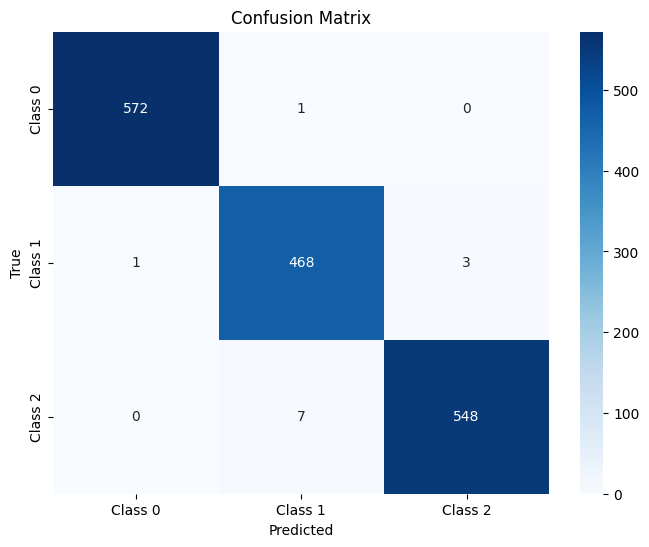

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_true_labels' and 'all_y_pred' are already defined

# Compute confusion matrix
cm = confusion_matrix(all_true_labels, all_y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()